In [325]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [136]:
analysis = pd.read_csv('Track_analysis.csv',index_col=0)
metadata = pd.read_csv('Track_metadata.csv',index_col=0)
musicbrainz = pd.read_csv('Track_musicbrainz.csv',index_col=0)
analysis.head()

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0.0,280.21506,0.238,0.0,0,0,0,0,...,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0.0,191.68608,0.000,0.0,0,0,0,0,...,0,0.501,-10.764,1,0.710,184.128,150.955,4,0.600,TRACCMH128F428E4CD
2,22050,0cadd310865701bb93ced1cd78e8910a,0.0,222.92853,0.000,0.0,0,0,0,0,...,1,0.329,-9.035,1,0.407,216.300,93.056,4,1.000,TRACCSW128F148C7C3
3,22050,14be4fc1170152c445b3be7b8d18dfec,0.0,278.38649,0.496,0.0,0,0,0,0,...,7,0.313,-23.095,1,0.387,278.386,127.113,1,0.446,TRACCXJ128F428F0CF
4,22050,1def5d8298e8cb29a188a5a7c0e9429a,0.0,89.15546,4.847,0.0,0,0,0,0,...,2,0.000,-20.359,1,0.000,79.203,90.660,3,0.524,TRACCVS12903D014F8


In [137]:
analysis.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence
count,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22050.0,0.0,238.507518,0.758616,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.276100,0.449573,-10.485668,0.691100,0.477784,229.975465,122.915449,3.564800,0.509937
std,0.0,0.0,114.137514,1.867952,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.554087,0.274974,5.399788,0.462063,0.191254,112.195735,35.184412,1.266239,0.373409
min,22050.0,0.0,1.044440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,-51.643000,0.000000,0.000000,1.044000,0.000000,0.000000,0.000000
25%,22050.0,0.0,176.032200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.000000,0.225000,-13.163250,0.000000,0.360000,168.856000,96.965750,3.000000,0.097750
50%,22050.0,0.0,223.059140,0.199000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.000000,0.469000,-9.380000,1.000000,0.487000,213.879000,120.161000,4.000000,0.551000
75%,22050.0,0.0,276.375060,0.421000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.000000,0.659000,-6.532500,1.000000,0.606000,266.292000,144.013250,4.000000,0.864000
max,22050.0,0.0,1819.767710,43.119000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.000000,1.000000,0.566000,1.000000,1.000000,1813.426000,262.828000,7.000000,1.000000


In [138]:
metadata.head()

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,mbtag,term
0,NaN,29785,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,...,0,0,Call of the Mastodon,223563,0.597641,SOVLGJY12A8C13FBED,Deep Sea Creature,2442524,heavy metal,80s
1,NaN,167867,0.561590,0.420570,AR2PT4M1187FB55B1A,NaN,NaN,NaN,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,...,0,0,Adelante,221677,NaN,SOGDQZK12A8C13F37C,No Quieras Marcharte,2423472,NaN,NaN
2,NaN,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,NaN,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,...,0,0,Ill Na Na,47304,0.588922,SODMVJR12A6D4F985D,If I...,507029,NaN,NaN
3,NaN,2799,0.391741,0.291265,ARUKJUP12086C14589,NaN,NaN,NaN,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,...,0,0,Massenet: Werther,295123,NaN,SOIWBDR12A8C13A4AC,Werther - Lyric Drama in four Acts/Act I/Alors...,3343102,NaN,NaN
4,NaN,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,...,0,0,Pentagrammaton,785362,NaN,SOHCCIA12AC907577F,Ad Te Clamamus Exsvles Mortva Liberi,8688607,NaN,NaN


In [139]:
musicbrainz.head()

,idx_artist_mbtags,year
0,0,2001
1,0,1984
2,0,0
3,0,0
4,0,2010


In [255]:
parameters = pd.DataFrame()
parameters = analysis[['duration','end_of_fade_in','key','loudness','start_of_fade_out','tempo','time_signature']]
parameters = pd.concat([parameters,metadata[['artist_familiarity','artist_hotttnesss','song_hotttnesss']]],axis=1) 
parameters['year'] = musicbrainz['year']

In [257]:
parameters  = parameters.loc[(parameters != 0).all(1)]
parameters = parameters.dropna()
parameters_description = parameters.describe()
parameters_description

,duration,end_of_fade_in,key,loudness,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,239.474511,1.189045,5.936849,-9.504607,229.959029,125.358116,3.601471,0.647688,0.454128,0.498727,1997.770080
std,98.446447,2.287591,3.156500,5.135965,96.536736,34.451003,1.176184,0.123870,0.107102,0.167881,10.464805
min,35.656690,0.060000,1.000000,-38.525000,32.316000,30.827000,1.000000,0.153606,0.112418,0.193858,1954.000000
25%,184.502405,0.177000,3.000000,-11.799500,176.509000,97.773000,4.000000,0.561476,0.377888,0.372530,1993.000000
50%,229.798730,0.311000,6.000000,-8.339000,219.870000,122.236000,4.000000,0.635899,0.431448,0.497439,2001.000000
75%,277.537505,0.940500,9.000000,-5.915500,266.274500,146.805000,4.000000,0.731515,0.513339,0.626343,2005.000000
max,1598.197100,32.972000,11.000000,-1.493000,1588.216000,258.677000,7.000000,1.000000,1.082503,1.000000,2010.000000


In [258]:
parameters_standard = (parameters - parameters.mean()) / parameters.std()
parameters_standard.describe()

,duration,end_of_fade_in,key,loudness,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
count,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03,1.631000e+03
mean,-2.160817e-15,4.813916e-16,7.406025e-17,1.178429e-15,3.417663e-15,-1.976755e-15,-1.219816e-16,-4.835699e-16,-6.072940e-15,1.061675e-14,-4.809560e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.070342e+00,-4.935518e-01,-1.564026e+00,-5.650427e+00,-2.047335e+00,-2.743929e+00,-2.211789e+00,-3.988729e+00,-3.190516e+00,-1.815979e+00,-4.182599e+00
25%,-5.583960e-01,-4.424063e-01,-9.304129e-01,-4.468280e-01,-5.536755e-01,-8.007057e-01,3.388318e-01,-6.959860e-01,-7.118477e-01,-7.517027e-01,-4.558212e-01
50%,-9.828471e-02,-3.838294e-01,2.000679e-02,2.269499e-01,-1.045097e-01,-9.062483e-02,3.388318e-01,-9.517254e-02,-2.117645e-01,-7.671355e-03,3.086460e-01
75%,3.866365e-01,-1.086491e-01,9.704265e-01,6.988184e-01,3.761829e-01,6.225329e-01,3.388318e-01,6.767396e-01,5.528448e-01,7.601583e-01,6.908796e-01
max,1.380164e+01,1.389363e+01,1.604040e+00,1.559903e+00,1.406985e+01,3.869811e+00,2.889453e+00,2.844220e+00,5.867064e+00,2.985877e+00,1.168672e+00


In [259]:
parameters.head()

,duration,end_of_fade_in,key,loudness,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
0,280.21506,0.238,5,-3.306,275.528,173.205,5,0.780462,0.574275,0.597641,2001
5,255.73832,0.156,9,-5.724,252.012,101.167,1,0.815923,0.555138,0.474055,2000
8,197.19791,0.276,4,-29.750,187.582,127.782,4,0.645192,0.471224,0.631601,2000
16,212.21832,0.285,5,-9.191,203.685,159.702,1,0.486679,0.362501,0.255103,1998
19,218.61832,1.147,6,-5.025,211.940,157.909,4,0.553194,0.359807,0.212045,2006


# Clustering

http://scikit-learn.org/stable/modules/clustering.html#k-means
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


## Find minimum inertia (error)
Ideally, we look for a 'knee' where the error stars dropping less quickly

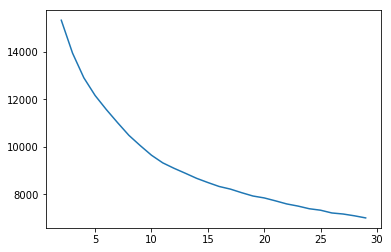

In [292]:
parameters_standard = np.array(parameters_standard)
inertia = []
k_vals = range(2,30)
for k in k_vals:
    clf = KMeans(n_clusters=k,n_jobs=-1)
    clf.fit(parameters_standard)
    cluster_labels = clf.predict(parameters_standard)
    inertia.append(clf.inertia_)
plt.plot(k_vals,inertia)

It appears that the knee occurs around 12 so we move forward with this k-value

In [293]:
k = 25
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(parameters_standard)
cluster_labels = clf.predict(parameters_standard)


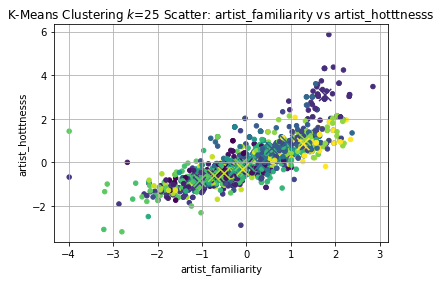

In [294]:
x_label = "artist_familiarity"
y_label = "artist_hotttnesss"
x_in = parameters.columns.get_loc(x_label)
y_in = parameters.columns.get_loc(y_label)
plt.scatter(parameters_standard[:,x_in],
            parameters_standard[:,y_in], c=cluster_labels,
            s=20,label=cluster_labels)
plt.scatter(clf.cluster_centers_[:,x_in],clf.cluster_centers_[:,y_in],marker='x',s=150,c=range(k))
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: "+x_label+" vs "+y_label)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()


# PCA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


In [295]:
from sklearn.decomposition import PCA

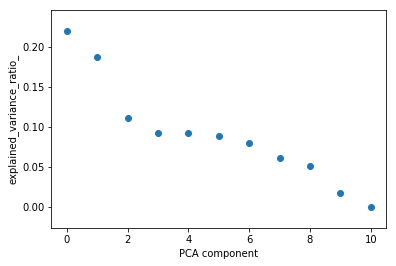

In [296]:
pca = PCA()
pca.fit(parameters_standard)
plt.scatter(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('explained_variance_ratio_')


In [297]:
X_pca = pca.transform(parameters_standard)
X_pca.shape

(1631, 11)

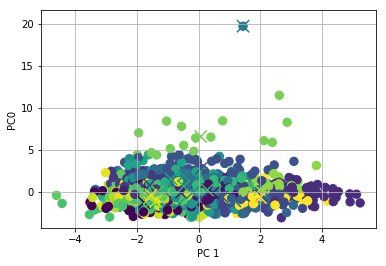

In [298]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels,
            s=70,label=cluster_labels)
pca_centers = pca.transform(clf.cluster_centers_)
plt.scatter(pca_centers[:,0],pca_centers[:,1],marker='x',s=150,c=range(k))
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

# TSNE
From http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.


In [299]:
from sklearn.manifold import TSNE

In [300]:
tsne = TSNE(n_components=2)

In [301]:
X_tsne = tsne.fit_transform(parameters_standard)

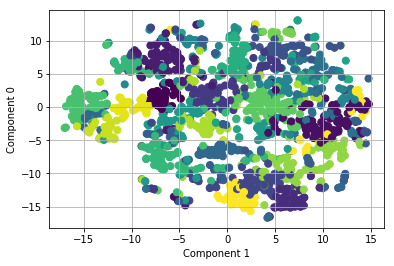

In [302]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=50,label=cluster_labels)
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()

## Compare to genres

Since our operations on the parameters DataFrame preserved indices, we should be able to match genres to clusters

[13, 26, 23, 22, 24, 40, 23, 25, 28, 29, 1, 29, 4, 27, 15, 24, 45, 21, 26, 10, 39, 18, 11, 16, 31]


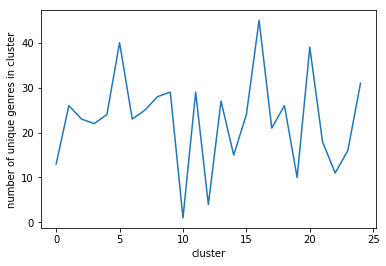

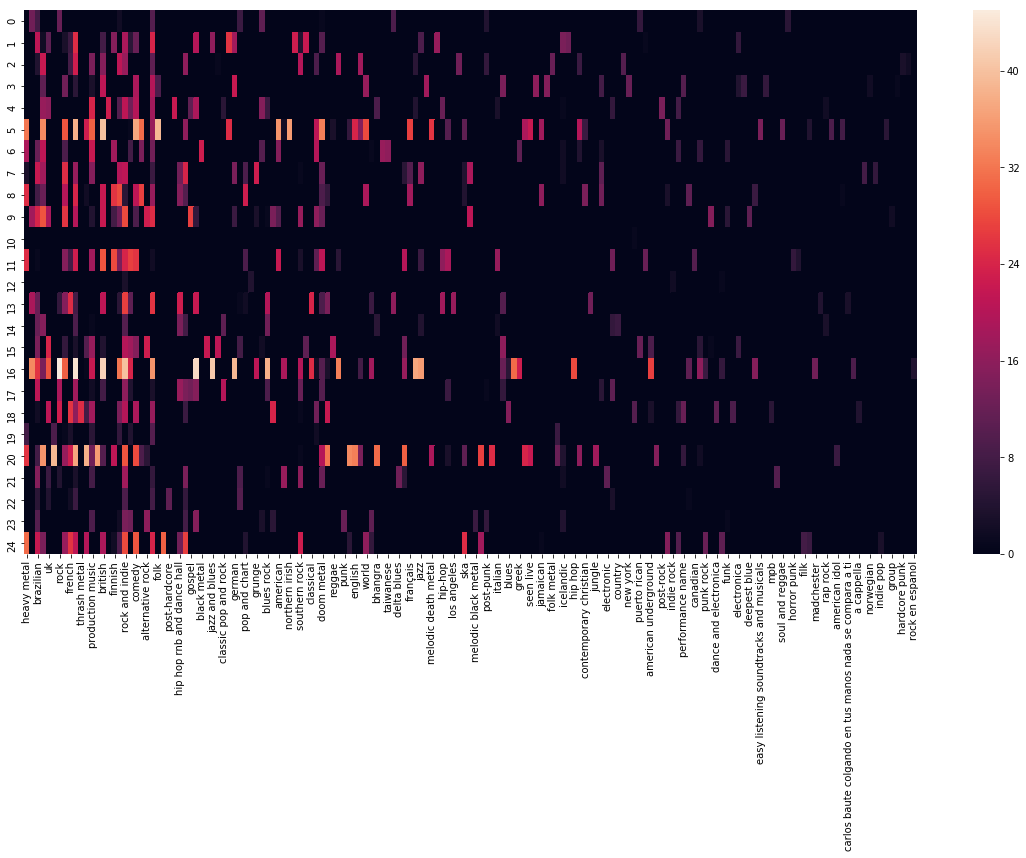

In [333]:
cluster_to_genre = pd.DataFrame({'cluster_labels':cluster_labels}, index = parameters.index)
cluster_to_genre = pd.merge(cluster_to_genre, metadata, left_index=True, right_index=True,how='left')
grouped = cluster_to_genre.groupby('cluster_labels')

num_unique_genres = []
unique_genres_in_cluster = []
for i in range(len(grouped)):
    num_unique_genres.append(grouped.get_group(i).mbtag.dropna().nunique())
    unique_genres_in_cluster.append(list(grouped.get_group(i).mbtag.dropna().unique()))

print(num_unique_genres)
plt.figure()
plt.plot(range(len(grouped)),num_unique_genres)
plt.xlabel("cluster")
plt.ylabel("number of unique genres in cluster")

unique_genres = list(cluster_to_genre.mbtag.dropna().unique())
overlaps = np.zeros((len(grouped),len(unique_genres)))
for i in range(len(grouped)):
    locs = []
    for j in range(len(unique_genres_in_cluster[i])):
        locs.append(unique_genres.index(unique_genres_in_cluster[i][j]))
        overlaps[i,locs] += 1

plt.figure(figsize=(20,10))    
ax = plt.subplot(111)
sns.heatmap(overlaps)
ax.set_xticklabels(unique_genres)


    

# One-hot encoding of genres

In [59]:
#One Hot Encoding
cat_cols = ["mbtag"]
df_continuous = pd.get_dummies(metadata,columns=cat_cols)
df_continuous.columns

Index(['analyzer_version', 'artist_7digitalid', 'artist_familiarity',
       'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_mbid', 'artist_name',
       ...
       'mbtag_wp musicians', 'mbtag_wu-tang', 'mbtag_x', 'mbtag_yé-yé',
       'mbtag_zouk', 'mbtag_zydeco', 'mbtag_éire', 'mbtag_ਪੰਜਾਬੀ',
       'mbtag_ਭੰਗੜਾ', 'mbtag_香港歌手'],
      dtype='object', length=747)